# Data Mining - HW01 - 98722278

Index:
1. Let's assume you work as a data mining consultant in a company which workes on search engines. Explain how using
techniques such as *Associate Rules, Clustering, Classification and Anomaly Detection* may help you.
2. Compute *Cosine distance, Correlation, Euclidean Distance and Jacard Index* for these two pair of vectors:
    1. `V1 = [1, 1, 1, 1]`, `V2 = [2, 2, 2, 2]`
    2. `V1 = [1, 0, 1, 0]`, `V2 = [0, 1, 0, 1]`
3. Consider finding K-nearest neighbors of a dataset. Here is the proposed algorithm:
    1. What happens if there is duplicate entries in dataset? (consider the distance of duplicate entries 0)
    2. How to solve this issue?

![proposed alg](wiki\3.jpg)

4. Compare dimentionality reduction approaches such as *PCA and SVD* versus *Aggregation based* methods.

5. What are pros and cons of sampling for reducing number of samples? Is sampling without replacement is a good
approach?

6. Download [Telco Churn dataset](https://www.kaggle.com/blastchar/telco-customer-churn)
    1. Analyze dataset
    2. Implement *Apriori* algorithm from scratch. Regarding aforementioned dataset, find proper parameteres. By
    increasing and decreasing different parameters such as *confidence* and *support* report the changes.
    3. As the output, report finest extract rules


 7. In this section, the goal is to train *KNN* and *DecisionTree* on [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)

1. DecisionTree
    1. Preprocessing
    2. Split into Train, test and Validation
    3. Train models    
    4. Report accuracy, recall and F-score metrics
2. KNN
    1. Preprocessing
    2. Feature Extraction
    3. Split into Train, test and Validation
    4. Train models    
    5. Report accuracy, recall and F-score metrics


In [224]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## 1 Classification, Clustering, Rules, Anomaly, etc in Search Engines

The most important feature of search engines is that they must provide result based on their relevance. But to
achieve these ranking for millions of possible outputs, search engines collect data and apply different machine
learning methods to achieve some score for each possible result or any combination of them. Let's go throughout the
some of methods such as Classification, Clustering, etc to clarify the situation.

**Classification** enables the machine to differetiate between different classes of contents. For instace, you looking
for a laptop for you needs, so the machine should be able to classify the content on the websites into different
categories and show you the results that only contain the classes you looking for. As we said there are billion of
websites out there so by just classifying the entire data into few categories (your keywords) the search space will
be much smaller to analyze for other steps.

Now let's consider the effect of **Association Rules**. Consider previous example which you wanted to buy a laptop.
It is a general case and after searching it you might not find wat you were looking for. Search engine needs more
keyword to specificly find your interests. So you add a laptop for teaching purposes. So, by adding this keyword,
search engines knows some rules that people who bought these type of laptops, also might need microphone and a good
webcam too. So if you try to search for mic or camera, you will get mostly results related to match with the
requirement of having a lecture.

But what is **Anomaly Detection**? In previous example, you are a student and looking for a mid-range devices because
 you need only a mediocre voice quality plus simple webcam to just communicate better. Mostly you are engaged with
 slides rather than your face! Anomaly means something that is not usual within results. In our case, most of the
 population who want laptop, mic and camera might be students or university lectureres, but gamers are here too. They
  need much more powerfull mic and cameras. So if you are student, you are not looking for a 2K resolution! Here the
  population wit less quantity is anomaly and need to be considered with different rules. Another example for this
  can be the typo in another languages. For instance, in middle eastern countries, most of the people forget to
  switch language to english and write their keywords in Arabic script. In this case a undefined word is being used
  enormously only for few IP ranges. So it triggers and alert and make the search engine to learn that anomalous
  behavior and convert it to a feature!

  **Clustering** is similar to classification but with this difference that the distance metric is the core of
  clustering which enables us to rank different results based on their distances to different center of clusters.
  Clusters provide topic-based results which also can be incorporated within an another cluster where enables
  hierarchical understanding of different topics and catergories. Clustering can be used for group of people in a
  particular location, for instance, people in middle east search for different clothes in summer than people in
  Russia. Or another case would be you looking for a specific keyword but it is rare or you don't enjoy the result,
  then search engine use clusters and replace the word you used by a more related word using underlying meaning of
  the keywords based on the clusters they are near to.

  PPS:
  1. Note that all of the previously mentioned approaches can be combined and even can be embedded within each
  other to
  provide more robust algorithms.
  2. Also, I have mostly used "word" and "keyword" as the input. Same definitions can be used for all type of inputs
  such as music or images.

## 2 *Cosine distance, Correlation, Euclidean Distance and Jacard Index* for
1. `V1 = [1, 1, 1, 1]`, `V2 = [2, 2, 2, 2]`
2. `V1 = [1, 0, 1, 0]`, `V2 = [0, 1, 0, 1]`

In [3]:
def cosine_distance(v1, v2):
    """
    Computes the cosine distance between two ND vectors
    s = V1.V2 / (|A|.|B|)

    :param v1: First vector
    :param v2: Second Vector
    :return: A float number
    """
    v1 = np.array(v1)
    v2 = np.array(v2)

    dot_product = np.sum([v1_ * v2_ for v1_, v2_ in zip(v1, v2)])
    return dot_product / (np.sqrt(np.sum(v1 ** 2)) * np.sqrt(np.sum(v2 ** 2)))

In [4]:
def correlation(v1, v2):
    """
    Computes the correlation between two ND vectors
    s = ((v1- v1_mean).(v2-v2_mean)) / sqrt((v1- v1_mean)**2.(v2-v2_mean)**2)

    :param v1: First vector
    :param v2: Second Vector
    :return: A float number
    """
    v1 = np.array(v1)
    v2 = np.array(v2)

    v1_norm = v1 - np.mean(v1)
    v2_norm = v2 - np.mean(v2)

    cov = np.sum([v1_ * v2_ for v1_, v2_ in zip(v1_norm, v2_norm)])
    denom = np.sqrt(np.sum(v1_norm**2) * np.sum(v2_norm**2))
    return  cov / denom

In [5]:
def euclidean_distance(v1, v2):

    """
    Computes the correlation between two ND vectors
    s = sum((v1-v2)**2)

    :param v1: First vector
    :param v2: Second Vector
    :return: A float number
    """
    v1 = np.array(v1)
    v2 = np.array(v2)

    return np.sqrt(np.sum([(v1_ - v2_)**2 for v1_, v2_ in zip(v1, v2)]))

In [6]:
def jaccard_index(v1, v2):
    """
    Computes the Jaccard index between two ND vectors
    s = intersection(v1, v2) / union(v1, v2)

    :param v1: First vector
    :param v2: Second Vector
    :return: A float number
    """
    m11 = np.sum(v1 & v2)
    m01 = np.sum(~v1 & v2)
    m10 = np.sum(v1 & ~v2)
    return m11 / (m11 + m01 + m10)

In [7]:
v1 = np.array([1, 1, 1, 1])
v2 = np.array([2, 2, 2, 2])
print('Cosine={}, Correlation={}, Eculidean={}'.format(cosine_distance(v1, v2), correlation(v1, v2), euclidean_distance(v1, v2)))

Cosine=1.0, Correlation=nan, Eculidean=2.0


c:\users\nikan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


In [9]:
v1 = np.array([1, 0, 1, 0])
v2 = np.array([0, 1, 0, 1])

print('Cosine={}, Correlation={}, Eculidean={}, Jaccard={}'.format(cosine_distance(v1, v2), correlation(v1, v2),
                                                                   euclidean_distance(v1, v2), jaccard_index(v1, v2)))


Cosine=0.0, Correlation=-1.0, Eculidean=2.0, Jaccard=0.0


## 3 K-Nearest Neighbors:
1. What happens if there is duplicate entries in dataset? (consider the distance of duplicate entries 0)
2. How to solve this issue?

![proposed alg](wiki\3.jpg)

### 3.A Duplicate entries
If we have duplicate entries which means zero distance in our distance transformed matrix of data, then for each
entry `i` if we have for instance `j` duplicates, then `i`'s top `j`s anwer would be only duplicate information so in
 KNN algorithm `j`th items out of `k` will be duplicate and there is zero learning.


### 3.B Solving duplicate entries
To solve the aforementioned issue, we can incorporate different approaches.
Depending on distance metric, if we can ensure that two same object have zero distance then
1. After constructing NxN
matrix of N entries of our dataset, we can simply remove all objects with index `j` with zero distance for every row
`i`. This is slow but robust appraoch as we ensure all data is cleansed.
2. This approach works as post processesing and is faster than previous one. In this method when we want to return
the top `K` results of for a specific input, we do not return `K` objects as there may be duplicate objects. We first
 find these objects by couting zero distance values, let's say `M` then returning `K+M` top results omitting index of
  items included by `M`.


## 4 Comparison of *PCA and SVD* vs. *Aggregation based* dimentionality reduction methods.

Methods such as PCA are statistical approaches where they use informations such as variance to extract most useful
attributes of the given dataset. In case of PCA, in simple terms, it first looks for the dimension with most of
variation in original data and creates a covariance matrix of these variations. Then a transformation is applied to
the original dimensions to achieve almost same representation but with much less data. So, the goal of PCA or SVD is
preserve the original varations of data meanwhile reducing number of attributes as much as possible.

In aggregation methods, the goal is the reduce variation to have more consistent and general (stable?) interpretation
 of the original data to extract more generalized rules. For instance, combining cities into regions which will tend
 to coarse info but more consistent inter or intra region wise.

 Another point that should be mentioned is that PCA or SVD has defined form of statistical measurements meanwhile
 aggregation methods are some heuristics that may not be applicable task to task or need to be defined for different
 set of data/tasks/algorithms.

## 5 Pros and cons of sampling? Sampling without replacement?

For many tasks the pure obtained data are too big and time consuming to be processed. So, to reduce the costs of
experiment and required time we prefer to sample a small subset of original data.

Sampling enables us to have almost all available information in original data with much fewer number of objects. This
 leads to huge speed up and much less expenses. But the problem is how we are going to choose a sample that could be
 representive of our entire data. Sampling means dopping most of data which leads to loss of information where maybe
 drasticly disastrous if dropped samples contain rare but desired information (think the case of anomaly detection).

 Simply put, a trade of between speed and quality of data is the real challenge.

Sampling w/ replacement vs wo/ replacement:

First of all, sampling with replacement means each time we try to sample an object, we give equal probability same as
 the intial probability of all objects but in case of without replacement, after an object got selected, we remove it
  from the pool or make probability of it getting selected equal to zero.

  What happens in the first case is that the sampled population has covariance of zero which means samples are in the
   vicinity of their expected value. But in the case of without replacement, a data with standard deviation of sigma
   will have a non-zero covaraince due to biased more to the last items. But if we sample infinitely from a
   population without replacement, we will have covariance of zero because of the law of large numbers (Bernouli LLNs).

   What we are looking for is a sampling with lower variance from the original dataset. Sampling with replacement
   achieve same expectation of original dataset meanwhile sampling without replacement may exactly sample the
   original dataset in the way that leads to same mean and zero variance for the corresponding distibution. So in
   real world, we looking for learning new things so sampling with replacement is not good approach in machine
   learning tasks as it may lead to biased learning or failing completely in imbalanced learning challenges.

## 6 [Telco Churn dataset](https://www.kaggle.com/blastchar/telco-customer-churn) Apriori
1. Analyze dataset
2. Implement *Apriori*
3. Find proper parameteres
4. As the output, report finest extracted rules

### 6.A Analyze dataset

In [195]:
df = pd.read_csv("..\data\TelcoChurn.csv")
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [196]:
# deleting customerID as it is useless in our case.
del df['customerID']
df.head(1)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [197]:
print('gender:',df.gender.unique())
print('SeniorCitizen:',df.SeniorCitizen.unique())
print('Partner:',df.Partner.unique())
print('Dependents:',df.Dependents.unique())
print('tenure:',df.tenure.unique())
print('PhoneService:',df.PhoneService.unique())
print('MultipleLines:',df.MultipleLines.unique())
print('InternetService:',df.InternetService.unique())
print('OnlineSecurity:',df.OnlineSecurity.unique())
print('OnlineBackup:',df.OnlineBackup.unique())
print('TechSupport:',df.TechSupport.unique())
print('StreamingTV:',df.StreamingTV.unique())
print('StreamingMovies:',df.StreamingMovies.unique())
print('Contract:',df.Contract.unique())
print('PaperlessBilling:',df.PaperlessBilling.unique())
print('MonthlyCharges:',df.MonthlyCharges.unique())
print('TotalCharges:',df.TotalCharges.unique())
print('PaymentMethod:',df.PaymentMethod.unique())
print('Churn:',df.Churn.unique())

df.SeniorCitizen.replace([0, 1], ['No', 'Yes'], inplace=True)

# in below cases we aggregate "no internet service" and "No"
df.MultipleLines.replace(["No", "Yes", "No phone service"],
                         ["No", "Yes", "No"], inplace= True)
df.OnlineSecurity.replace(["No", "Yes", "No phone service"],
                          ["No", "Yes", "No"], inplace= True)
df.OnlineBackup.replace(["No", "Yes", "No phone service"],
                        ["No", "Yes", "No"], inplace= True)
df.TechSupport.replace(["No", "Yes", "No phone service"],
                       ["No", "Yes", "No"], inplace= True)
df.StreamingTV.replace(["No", "Yes", "No phone service"],
                       ["No", "Yes", "No"], inplace= True)
df.StreamingMovies.replace(["No", "Yes", "No phone service"],
                           ["No", "Yes", "No"], inplace= True)

# aggregating "one year" and "two year"
df.Contract.replace(["Month-to-month", "One year", "Two year"],
                    ["Monthly", "Yearly", "Yearly"], inplace= True)

# aggregating "Electronic check" and "Mailed check" into one and
# "Bank transfer (automatic)" and "Credit card (automatic)" into another
df.PaymentMethod.replace(["Electronic check", "Mailed check",
                  "Bank transfer (automatic)", "Credit card (automatic)"],
                 ["Check", "Check", "automatic", "automatic"], inplace= True)

df.head(5)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (aut

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Yearly,No,Check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,Yearly,No,automatic,42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Check,70.70,151.65,Yes


In [198]:
# convert continuous values (tenure, MonthlyCharges, TotalCharges)
print(df.tenure.describe())
df.loc[(df.tenure >= 0) & (df.tenure<9), 'tenure'] = 0
df.loc[(df.tenure >= 9) & (df.tenure<29), 'tenure'] = 1
df.loc[(df.tenure >= 29) & (df.tenure<55), 'tenure'] = 2
df.loc[(df.tenure >= 55), 'tenure'] = 3
df.loc[(df.tenure == 0), 'tenure'] = 's'
df.loc[(df.tenure == 1), 'tenure'] = 'm'
df.loc[(df.tenure == 2), 'tenure'] = 'l'
df.loc[(df.tenure == 3), 'tenure'] = 'xl'

print('\n\n',df.MonthlyCharges.describe())
df.loc[(df.MonthlyCharges >= 0) & (df.MonthlyCharges<35), 'MonthlyCharges'] = 0
df.loc[(df.MonthlyCharges >= 35) & (df.MonthlyCharges<70), 'MonthlyCharges'] = 1
df.loc[(df.MonthlyCharges >= 70) & (df.MonthlyCharges<89), 'MonthlyCharges'] = 2
df.loc[(df.MonthlyCharges >= 89), 'MonthlyCharges'] = 3
df.MonthlyCharges = df.MonthlyCharges.astype(np.uint8)
df.loc[(df.MonthlyCharges == 0), 'MonthlyCharges'] = 's'
df.loc[(df.MonthlyCharges == 1), 'MonthlyCharges'] = 'm'
df.loc[(df.MonthlyCharges == 2), 'MonthlyCharges'] = 'l'
df.loc[(df.MonthlyCharges == 3), 'MonthlyCharges'] = 'xl'

# zerp non-values from dataframe from TotalCharges
nan_values = pd.to_numeric(df['TotalCharges'],
                           errors='coerce').isnull().values.nonzero()[0]
df.loc[nan_values,'TotalCharges'] = 0
df.TotalCharges = pd.to_numeric(df['TotalCharges'], errors='coerce')

print('\n\n',df.TotalCharges.describe())
df.loc[(df.TotalCharges >= 0) & (df.TotalCharges<398), 'TotalCharges'] = 0
df.loc[(df.TotalCharges >= 398) & (df.TotalCharges<1394), 'TotalCharges'] = 1
df.loc[(df.TotalCharges >= 1394) & (df.TotalCharges<3786), 'TotalCharges'] = 2
df.loc[(df.TotalCharges >= 3786), 'TotalCharges'] = 3
df.TotalCharges = df.TotalCharges.astype(np.int8)

df.loc[(df.TotalCharges == 0), 'TotalCharges'] = 's'
df.loc[(df.TotalCharges == 1), 'TotalCharges'] = 'm'
df.loc[(df.TotalCharges == 2), 'TotalCharges'] = 'l'
df.loc[(df.TotalCharges == 3), 'TotalCharges'] = 'xl'

df.head(5)


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


 count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


 count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,s,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Check,s,s,No
1,Male,No,No,No,l,Yes,No,DSL,Yes,No,Yes,No,No,No,Yearly,No,Check,m,l,No
2,Male,No,No,No,s,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Check,m,s,Yes
3,Male,No,No,No,l,No,No,DSL,Yes,No,Yes,Yes,No,No,Yearly,No,automatic,m,l,No
4,Female,No,No,No,s,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Check,l,s,Yes


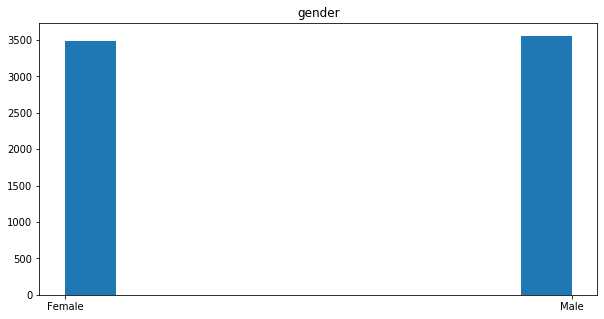

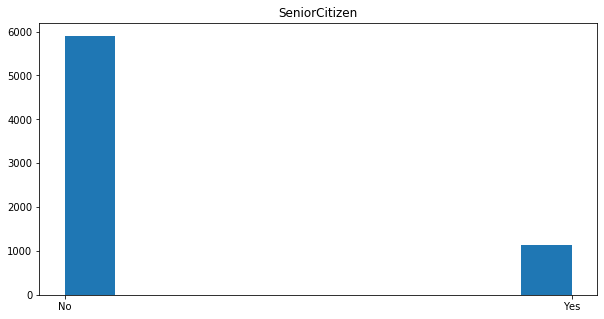

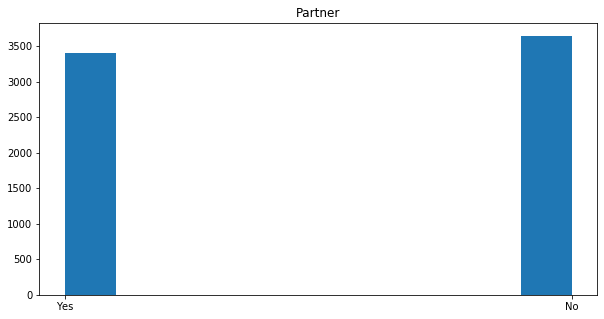

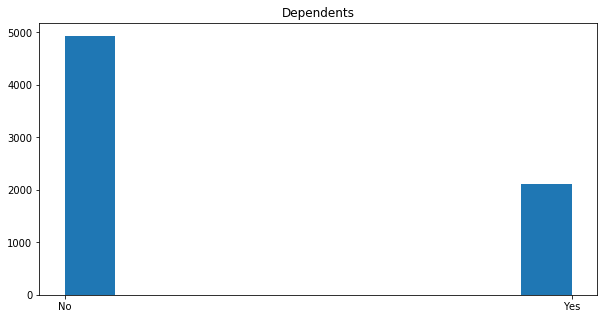

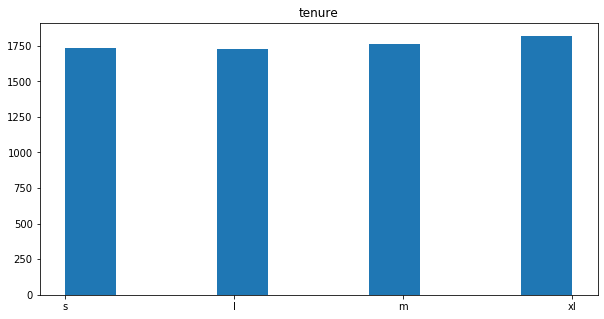

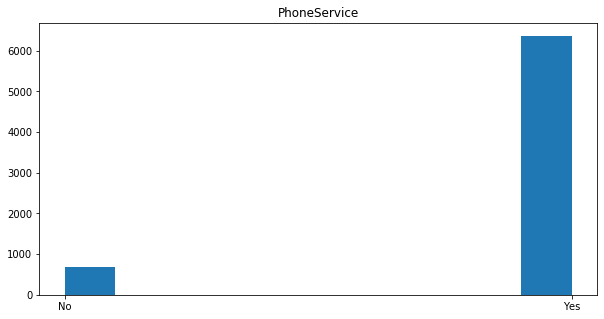

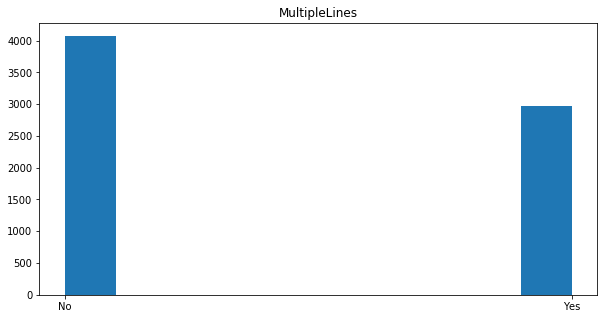

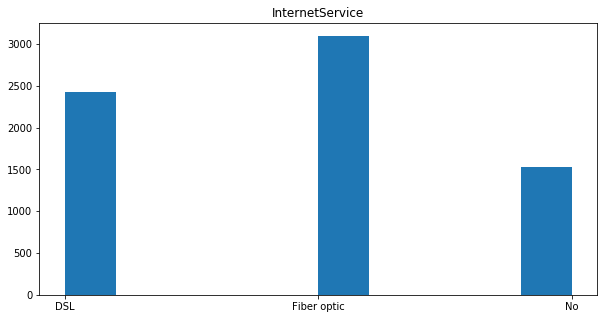

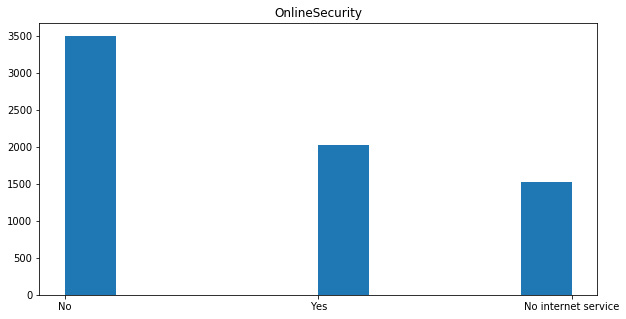

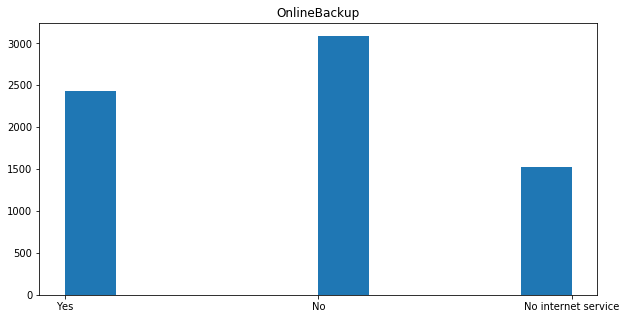

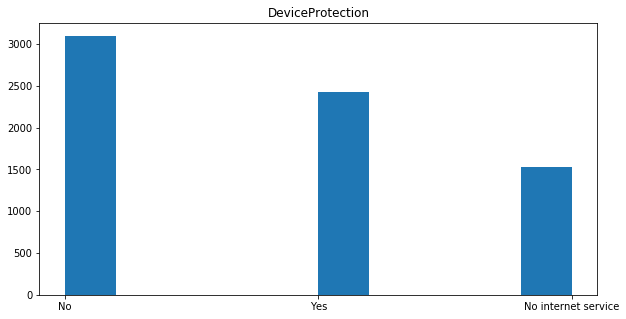

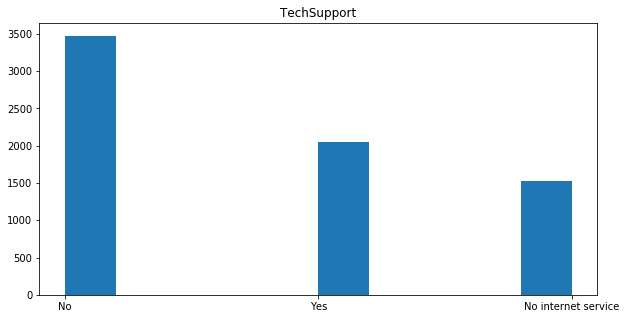

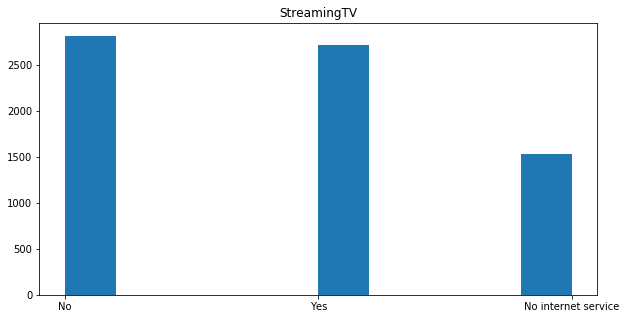

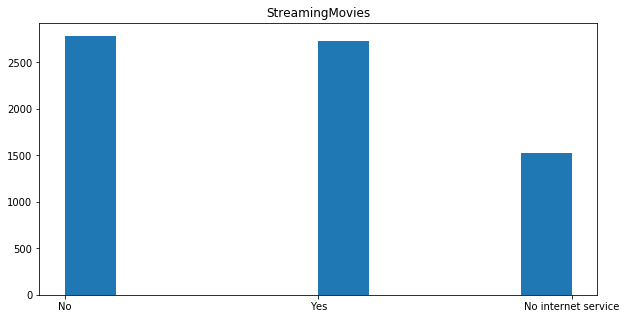

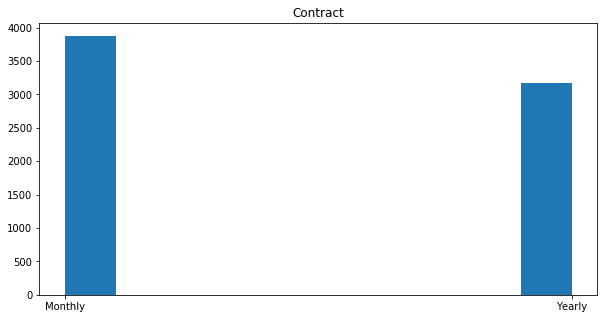

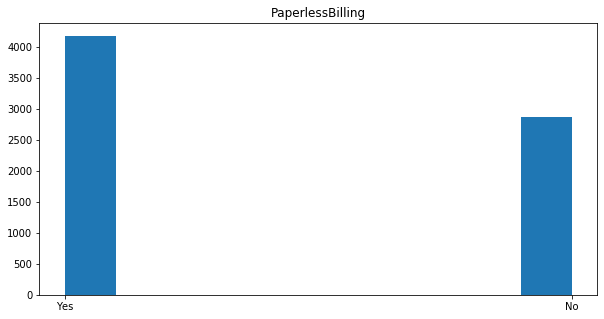

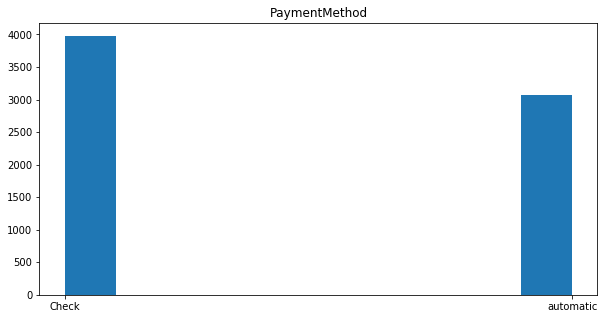

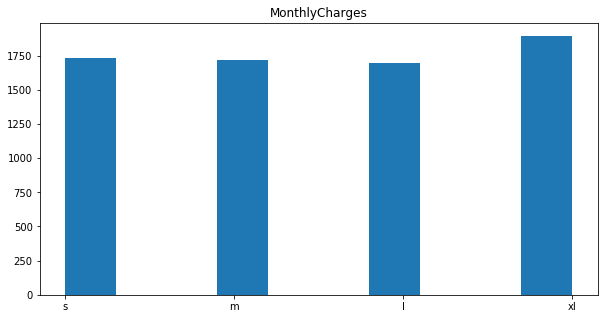

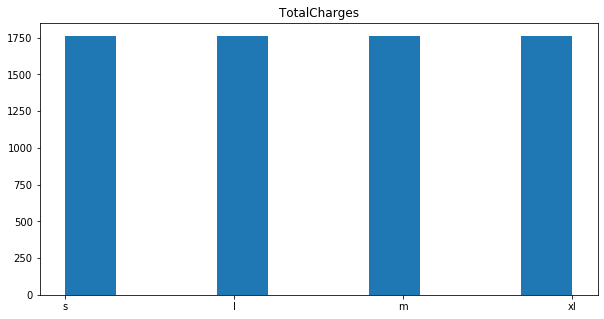

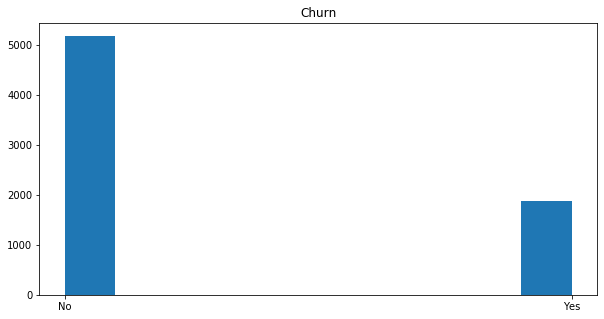

In [218]:
for i in range(len(df.columns)):
    df[df.columns[i]].hist(figsize=(10, 5), grid=False)
    plt.title(df.columns[i])
    plt.show()



In [219]:
# drop missing values
df.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [187]:
# convert entire dataframe into onehot encoded
print(df.shape)
df = pd.get_dummies(df)
print(df.shape)
df.head(5)

(7043, 20)
(7043, 53)


,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure_l,tenure_m,...,MonthlyCharges_l,MonthlyCharges_m,MonthlyCharges_s,MonthlyCharges_xl,TotalCharges_l,TotalCharges_m,TotalCharges_s,TotalCharges_xl,Churn_No,Churn_Yes
0,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,0,1,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,1,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


6.B Apriori Implementation

6.C Find proper parameters

6.D Report finest extracted rules

## 7 Train *KNN* and *DecisionTree* on [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)
1. DecisionTree
    1. Preprocessing
    2. Split into Train, test and Validation
    3. Train models    
    4. Report accuracy, recall and F-score metrics
2. KNN
    1. Preprocessing
    2. Feature Extraction
    3. Split into Train, test and Validation
    4. Train models    
    5. Report accuracy, recall and F-score metrics

### 7.A DecisionTree
1. Preprocessing
2. Split into Train, test and Validation
3. Train models    
4. Report accuracy, recall and F-score metrics

#### 7.A.a Preprocessing
In this step we apply normialization to have images with mean zero and variance of 1. This enables algorithms with
distance based metrics to apply same importance to every pixel of image.

In [66]:
from utils import mnist_reader
x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

print('number of train samples=', len(x_train))
print('number of test samples=', len(x_test))
print('shape of samples=', x_train[0].shape)

number of train samples= 60000
number of test samples= 10000
shape of samples= (784,)


In [ ]:
# standardization
x_train = x_train/255
x_test = x_test/255

# normalization
x_train = (x_train - x_train.mean()) / x_train.var()
x_test = (x_test - x_test.mean()) / x_test.var()

#### 7.A.b Split into train, test and validation

In [ ]:
# split into train validation for hyper parameter tuning
import random

val_size = 10000
val_index = random.sample(range(0, len(x_train)), val_size)
split_index = np.array([0 if i in val_index else -1 for i in range(len(x_train))])

#### 7.A.c Train models

In [69]:
# grid search model training
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 'max_depth':[5, 10, None], 'min_samples_leaf':[2, 5, 10]}
dt = DecisionTreeClassifier()
pds = PredefinedSplit(test_fold=split_index)

classifier = GridSearchCV(dt, parameters, cv=pds, scoring='accuracy')

classifier.fit(x_train, y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
           

In [71]:
classifier.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2}

#### 7.A.d Report metrics

In [85]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
y_pred = classifier.predict(x_test)
print('F1={}, Recall={}, Accuracy={}'.format(f1_score(y_test, y_pred, average='macro'), 
                                             recall_score(y_test, y_pred, average='macro'), 
                                             accuracy_score(y_test, y_pred)))

F1=0.8094858144584004, Recall=0.8114000000000001, Accuracy=0.8114


### 7.B KNN
1. Preprocessing
2. Feature Extraction
3. Split into Train, test and Validation
4. Train models    
5. Report accuracy, recall and F-score metrics

#### 7.B.a Preprocessing

In [3]:
from utils import mnist_reader
x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

print('number of train samples=', len(x_train))
print('number of test samples=', len(x_test))
print('shape of samples=', x_train[0].shape)

number of train samples= 60000
number of test samples= 10000
shape of samples= (784,)


#### 7.B.b Feature extraction

A feature descriptor is a representation of an image or an image patch that simplifies the image by extracting useful information and throwing away extraneous information.

In the HOG feature descriptor, the histograms of directions of gradients are used as features. Gradients (x and y derivatives) of an image are useful because the magnitude of gradients is large around edges and corners (regions of drastic intensity changes) and we know that edges and corners pack in a lot more information about object shape than flat regions.

In [ ]:
import cv2
import numpy as np

def extract_hog(data, shape=(28, 28)):
    """
    Creates hitogram of gradient of images

    :param data: dataset of image using nd numpy array
    :return: A nd array of features with same length but different dim
    """

    winSize = (18,18)
    blockSize = (18,18)
    blockStride = (9,9)
    cellSize = (9,9)
    nbins = 4
    derivAperture = 1
    winSigma = 4.
    histogramNormType = 0
    L2HysThreshold = 2.0000000000000001e-01
    gammaCorrection = 0
    nlevels = 64
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                            histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
    
    feature_size = hog.compute(data[0].reshape(shape)).shape[0]

    data_features = np.zeros((len(data), feature_size))
    for idx, img in enumerate(data):
        img = img.reshape(shape)
        h = hog.compute(img)
        h = h.reshape(1, -1)
        data_features[idx,:] = h
    return data_features

# extract_hog([x_train[0]]).shape
x_train_features = extract_hog(x_train)
x_test_features = extract_hog(x_test)

#### 7.B.c Split into train, test and validation

In [ ]:
# split into train validation for hyper parameter tuning
import random

val_size = 10000
val_index = random.sample(range(0, len(x_train_features)), val_size)
split_index = np.array([0 if i in val_index else -1 for i in range(len(x_train_features))])

#### 7.B.d Train models

In [15]:
# grid search model training
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV

# parameters = {'n_neighbors':[5, 10, 20, 30, 50], 'leaf_size':[10, 20, 30, 40, 50], 'p':[1, 2, 3, 4]}
parameters = {'n_neighbors':[10, 20], 'leaf_size':[10, 20], 'p':[1, 2]}
knn = KNeighborsClassifier()
pds = PredefinedSplit(test_fold=split_index)

classifier = GridSearchCV(knn, parameters, cv=pds, scoring='accuracy')

classifier.fit(x_train_features, y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [10, 20], 'n_neighbors': [10, 20],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

#### 7.B.e Report metrics

In [17]:
from sklearn.metrics import f1_score, recall_score, accuracy_score
y_pred = classifier.predict(x_test_features)
print('F1={}, Recall={}, Accuracy={}'.format(f1_score(y_test, y_pred, average='macro'), 
                                             recall_score(y_test, y_pred, average='macro'), 
                                             accuracy_score(y_test, y_pred)))

F1=0.8279013513251632, Recall=0.8273999999999999, Accuracy=0.8274
